<a href="https://colab.research.google.com/github/RedSafir/PCD-UTS/blob/main/Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Histogram</h1>

In [3]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

<h1>Load Gambar</h1>

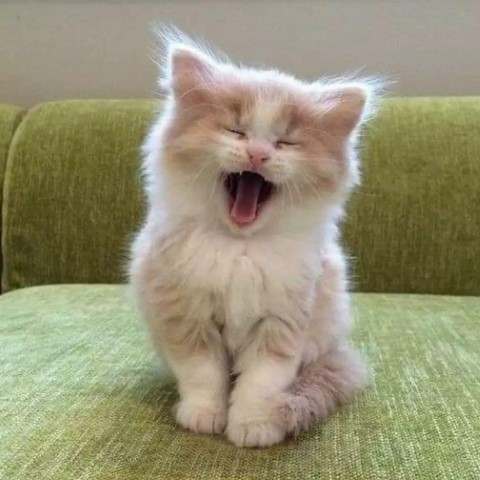

In [3]:
img = cv2.imread("dumy-img-1.jpg")
cv2_imshow(img)

<h2>Terdapat beberapa operasi yang ada pada histogram</h1>
<p>yaitu :</p>
<ol>
  <li>GreyScale Histogram</li>
  <li>RGB Histogram</li>
  <li>Equalization Histogram</li>
</ol>

<h1>1. GreyScale Histogram</h1>

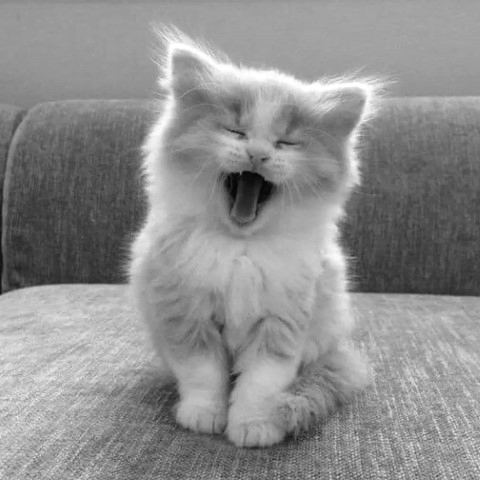

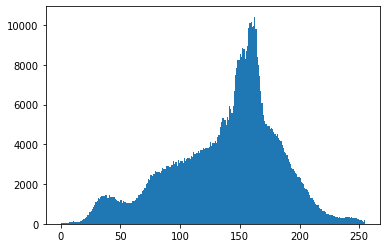

In [20]:
img = cv2.imread("dumy-img-1.jpg")

H, W = img.shape[:2]
grey = np.zeros((H, W))

for i in range(H):
  for j in range(W):
    grey[i,j] = np.clip(0.299 * img[i, j, 0] +
                        0.587 * img[i, j, 1] +
                        0.144 * img[i, j, 2], 0, 255)

cv2_imshow(grey)
plt.hist(img.ravel(), 255, [0, 255])
plt.show()

<h1>2. RGB Histogram</h1>

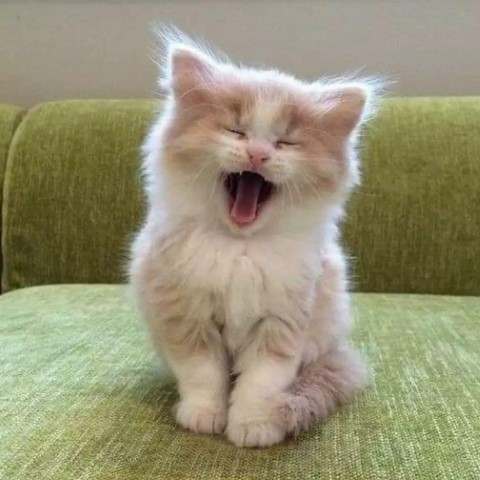

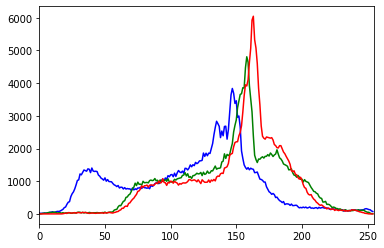

In [4]:
img = cv2.imread("dumy-img-1.jpg")

color = ("b", "g", "r")

for i, col in enumerate(color):
  histo = cv2.calcHist([img], [i], None, [255], [0,255])
  plt.plot(histo, color = col) 
  plt.xlim([0, 255])

cv2_imshow(img)
plt.show()

<h1>3. Equalization Histogram</h1>

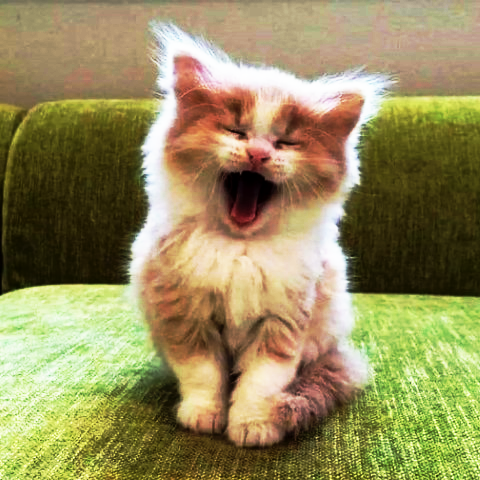

In [6]:
img = cv2.imread("dumy-img-1.jpg")

hist, bins = np.histogram(img.flatten(), 256, [0, 255])
cdf = hist.cumsum()
cdf_norm = cdf * hist.max() / cdf.max()
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m).astype('uint8')
image = cdf[img]

cv2_imshow(image)